# Regresión con Bosques Aleatorios

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

In [1]:
# Importa las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Carga los datos en la variable boston
boston = datasets.load_boston()

In [3]:
# Transforma a un dataframe para visualizar
col_names = list(boston.feature_names)
col_names.append('TARGET')
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=col_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
# Imprime las llaves del conjunto de datos
print('Información en el dataset:')
print(boston.keys())

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



In [5]:
# Imprime las características del conjunto de datos
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [7]:
# Imprime los nombres de las columnas
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
#Selecciona solamente la columna 6 del dataset en la variable X_adr
X_adr = boston.data[:, np.newaxis, 5]

In [9]:
#Selecciona la columna target en la variable y_adr
y_adr = boston.target

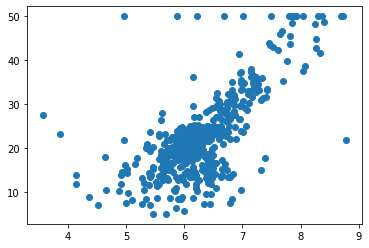

In [10]:
#Grafica los datos correspondientes con la función plt.scatter
plt.scatter(X_adr, y_adr)
plt.show()

In [11]:
#Separa el conjunto de datos en conjunto de entrenamiento y pruebas para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [12]:
#Define el algoritmo a utilizar (n_estimators = 300, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
adr = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [13]:
#Entrena el modelo
adr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
#Realiza una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[20.423      20.423      11.871      32.37833333 17.43613333 19.07533333
 20.57896667 22.582      15.35571944 27.40333333 21.744      18.86633333
 33.92497778 17.794      18.97230873 13.60916667 27.16233333 22.11733333
 19.88433333 19.90166667 25.00411111 33.43033333 45.77166667 45.93777778
 16.63266667 45.77166667 17.4448     42.16       19.961      16.013825
 22.582      25.18561111 35.96243333 20.18266667 23.032      28.26333333
 36.28233333 19.32433333 18.31516667 20.14952937 49.7476     19.26733333
 16.35466667 18.493      13.70433333 30.71533333 21.78246667 13.72066667
 18.95298095 20.36011111 18.395      10.75933333 21.9385     34.89466667
 13.717      11.22966667 16.82886111 25.22583333 16.552      20.1659
 19.10833333 18.76233333 20.66666667 21.16193333 18.13316667 26.138
 19.80642222 23.37046667 49.24813333 13.57878492 30.70266667 33.53733333
 21.32066667 36.18666667 13.84266667 17.87033333 19.15904444 33.403
 16.149      17.879      23.21050159 21.23966667 19.19204444 25.446

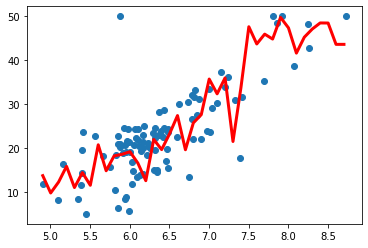

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.9042512009656437


In [15]:
#Grafica los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))